In [1]:
import json
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from tqdm import tqdm

from search_clustering.utils.odp_239 import *


df = read_odp239_to_df()
data = create_odp239_splits(df)
data = embed_odp239_labels_in_splits(data)

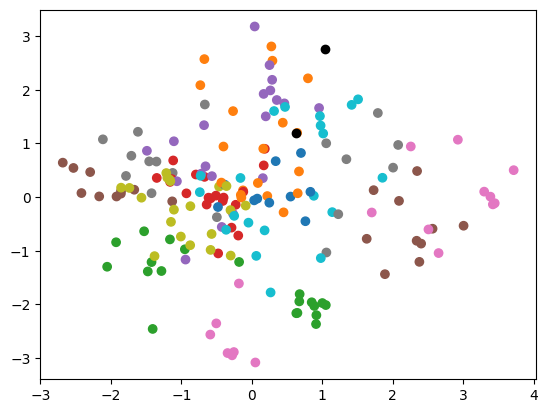

In [3]:
colors = [f"C{c}" for c in data["Arts"]["target_embeddings"].values()]
pca = PCA(n_components=2)
vecs = pca.fit_transform(np.vstack(data["Arts"]["target_embeddings"]))
plt.scatter(vecs[:, 0], vecs[:, 1], color=colors)

pred = np.vstack(
    [
        embed_target_name("anime club", DEFAULT_EMBEDDINGS),
        embed_target_name("cartoon", DEFAULT_EMBEDDINGS),
    ]
)
pred = pca.transform(pred)
plt.scatter(pred[:, 0], pred[:, 1], color="black")

plt.show()